In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import threading
import random
import time
import math

### We create our own random dataset for different locations (Longitude & Lattitude)

In [2]:
df = pd.DataFrame()
df['Longitude'] = random.sample(range(10, 60), 50)
df['Lattitude'] = random.sample(range(20, 80), 50)

<AxesSubplot:xlabel='Longitude', ylabel='Lattitude'>

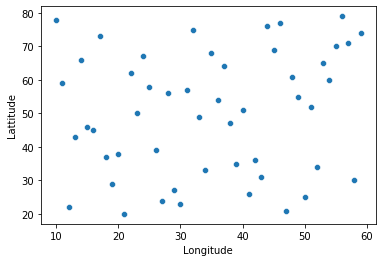

In [3]:
sns.scatterplot(x=df['Longitude'],y=df['Lattitude'])

In [4]:
from sklearn.cluster import KMeans
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

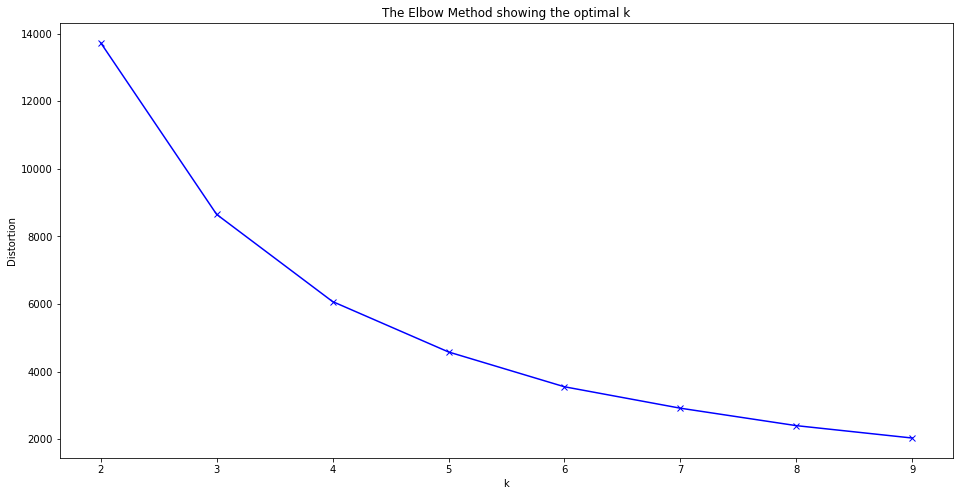

In [5]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Selecting number of clusters = 3

In [6]:
k=3
kmeanModel = KMeans(n_clusters=k,init='k-means++',n_init=100)
kmeanModel.fit(df)
kmeanModel.cluster_centers_

array([[21.2       , 57.53333333],
       [47.5625    , 66.6875    ],
       [34.        , 30.36842105]])

In [7]:
df['Cluster_Number'] = kmeanModel.labels_.tolist()

In [8]:
df

,Longitude,Lattitude,Cluster_Number
0,48,61,1
1,55,70,1
2,16,45,0
3,52,34,2
4,54,60,1
5,57,71,1
6,14,66,0
7,51,52,1
8,56,79,1
9,53,65,1


In [9]:
cluster_0 = df[df['Cluster_Number']==0]
cluster_1 = df[df['Cluster_Number']==1]
cluster_2 = df[df['Cluster_Number']==2]

### Cluster-0

<AxesSubplot:xlabel='Longitude', ylabel='Lattitude'>

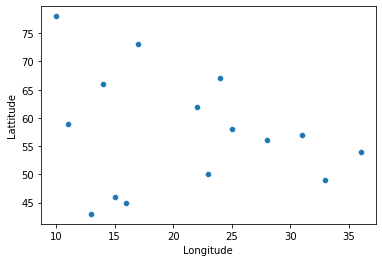

In [10]:
sns.scatterplot(x=cluster_0['Longitude'],y=cluster_0['Lattitude'])

In [11]:
cluster_0.to_csv("data.csv",index=False)

In [12]:
cluster_0.head(200)

,Longitude,Lattitude,Cluster_Number
2,16,45,0
6,14,66,0
11,25,58,0
14,24,67,0
22,13,43,0
23,22,62,0
25,33,49,0
26,15,46,0
27,23,50,0
31,36,54,0


### Cluster-1

<AxesSubplot:xlabel='Longitude', ylabel='Lattitude'>

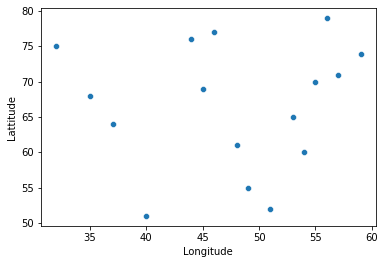

In [13]:
sns.scatterplot(x=cluster_1['Longitude'],y=cluster_1['Lattitude'])

### Cluster-2

<AxesSubplot:xlabel='Longitude', ylabel='Lattitude'>

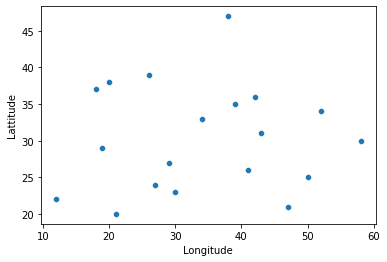

In [14]:
sns.scatterplot(x=cluster_2['Longitude'],y=cluster_2['Lattitude'])

In [15]:
cluster_0_X_mean = cluster_0['Longitude'].mean()
cluster_0_Y_mean = cluster_0['Lattitude'].mean()

cluster_1_X_mean = cluster_1['Longitude'].mean()
cluster_1_Y_mean = cluster_1['Lattitude'].mean()

cluster_2_X_mean = cluster_2['Longitude'].mean()
cluster_2_Y_mean = cluster_2['Lattitude'].mean()

In [16]:
final_centralized_point_X = (cluster_0_X_mean + cluster_1_X_mean + cluster_2_X_mean)/k
final_centralized_point_y = (cluster_0_Y_mean + cluster_1_Y_mean + cluster_2_Y_mean)/k
print("Final Centralized Point : ",final_centralized_point_X," , ",final_centralized_point_y)

Final Centralized Point :  34.25416666666667  ,  51.529751461988305


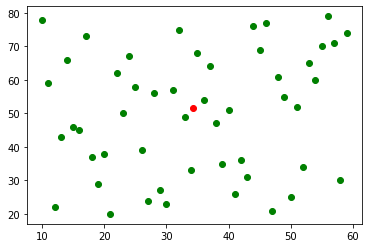

In [17]:
plt.scatter(df['Longitude'], df['Lattitude'], color='green')
plt.scatter(x=[final_centralized_point_X],y=[final_centralized_point_y], color='red')

In [18]:
# Euclidean Distance
df['Distance_from_centralized_point'] = (df['Longitude'] - final_centralized_point_X)**2 + (df['Lattitude']-final_centralized_point_y)**2
df['Distance_from_centralized_point'] = (df['Distance_from_centralized_point'])**0.5
df

,Longitude,Lattitude,Cluster_Number,Distance_from_centralized_point
0,48,61,1,16.692320
1,55,70,1,27.776603
2,16,45,0,19.386909
3,52,34,2,24.944073
4,54,60,1,21.485880
5,57,71,1,29.941001
6,14,66,0,24.892155
7,51,52,1,16.752435
8,56,79,1,35.035636
9,53,65,1,23.083628


In [19]:
min_value = df['Distance_from_centralized_point'].min()
min_value

2.82357512512236

In [20]:
starting_point = df[df['Distance_from_centralized_point']==min_value]
starting_point

,Longitude,Lattitude,Cluster_Number,Distance_from_centralized_point
25,33,49,0,2.823575


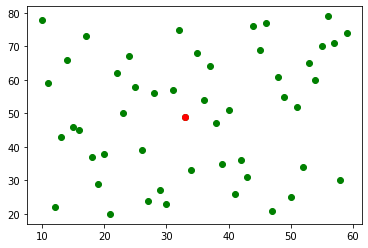

In [21]:
plt.scatter(df['Longitude'], df['Lattitude'], color='green')
plt.scatter(x=starting_point['Longitude'],y=starting_point['Lattitude'], color='red')

### Overall Visual

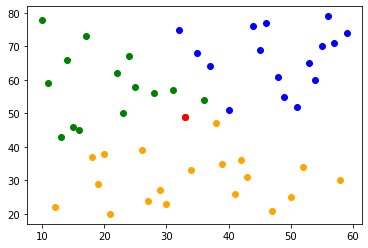

In [22]:
plt.scatter(cluster_0['Longitude'], cluster_0['Lattitude'], color='green')
plt.scatter(cluster_1['Longitude'], cluster_1['Lattitude'], color='blue')
plt.scatter(cluster_2['Longitude'], cluster_2['Lattitude'], color='orange')
plt.scatter(x=starting_point['Longitude'],y=starting_point['Lattitude'], color='red')

### Genetic Algorithm

In [23]:
class Population:
    
    chromosomes = None
    best_candidate = None
    super_candidate = None
    
    def __init__(self):
        self.chromosomes = np.array([])
    
    def add_chromosome(self,chrsm):
        self.chromosomes = np.append(self.chromosomes,chrsm)
    
    def get_best_candidate(self):
        chrms_list = self.chromosomes.tolist()
        chrms_list.sort(key=lambda x: x.fitness)
        self.best_candidate = chrms_list[0]
    
    def remove_chromosome(self,index):
        self.chromosomes = np.delete(self.chromosomes, [index])
    
    def get_super_candidate(self):
        if(self.super_candidate==None):
            self.super_candidate = self.best_candidate
        else:
            self.super_candidate.calculate_fitness()
            self.best_candidate.calculate_fitness()
            if(self.super_candidate.fitness > self.best_candidate.fitness):
                self.super_candidate = self.best_candidate
        

In [24]:
class chromosome:
    genes_array = None
    fitness = -1
    
    def __init__(self,items):
        self.genes_array = np.array(items)
    
    def shuffle(self):
        np.random.shuffle(self.genes_array)
    
    def append_starting_point(self,starting_point):
        if(starting_point in self.genes_array):
            index = np.where(self.genes_array == starting_point)
            self.genes_array = np.delete(self.genes_array, index)
            
        self.genes_array = np.append(starting_point,self.genes_array)
    
    def calculate_fitness(self):
        total_distance = 0
        for x in range(0,len(self.genes_array)-1):
            point_1_x = df.iloc[self.genes_array[x]]['Longitude']
            point_2_x = df.iloc[self.genes_array[x+1]]['Longitude']
            point_1_y = df.iloc[self.genes_array[x]]['Lattitude']
            point_2_y = df.iloc[self.genes_array[x+1]]['Lattitude']
            distance = (point_1_x - point_2_x)**2 + (point_1_y - point_2_y)**2
            distance = distance**0.5
            total_distance = total_distance + distance
        self.fitness = total_distance
            

In [25]:
class tournament_selection:
    winner = None
    candidate_list = []
    
    def __init__(self):
        self.candidate_list = []
    
    def add_candidate(self,candidate):
        self.candidate_list.append((candidate,candidate.fitness))
        
    def perform_selection(self):
        self.candidate_list.sort(key=lambda i:i[1])
        self.winner = self.candidate_list[0][0]
        
    

In [26]:
class cross_over:
    parent_1 = None
    parent_2 = None
    offspring = None
    limit = None
    
    def __init__(self,parent_1,parent_2,limit):
        self.parent_1 = parent_1
        self.parent_2 = parent_2
        self.limit = limit
        
    def produce_offspring(self):
        turn = 0
        size = self.limit
        index_1 = 0
        index_2 = 0
        self.offspring = []
        while(len(self.offspring)!=size):
            if(index_1<size and index_2<size and self.parent_1.genes_array[index_1]==self.parent_2.genes_array[index_2]):
                self.offspring.append(self.parent_1.genes_array[index_1])
                index_1+=1
                index_2+=1
            else:
                if(turn==0):
                    if(index_1<size and not(self.parent_1.genes_array[index_1] in self.offspring)):
                        self.offspring.append(self.parent_1.genes_array[index_1])
                        turn = 1

                    index_1+=1

                elif(turn==1):
                    if(index_2<size and not(self.parent_2.genes_array[index_2] in self.offspring)):
                        self.offspring.append(self.parent_2.genes_array[index_2])
                        turn = 0

                    index_2+=1


In [27]:
class mutation:
    offspring = None
    limit = None
    
    def __init__(self,offspring,limit):
        self.offspring = offspring
        self.limit = limit
    
    def mutate(self,offspring):
        first_random_index = random.randint(1,self.limit-1)
        second_random_index = random.randint(1,self.limit-1)
        
        temp = offspring[first_random_index]
        offspring[first_random_index] = offspring[second_random_index]
        offspring[second_random_index] = temp

In [28]:
# # For cluster 0
# run=5000
# pop_size = 30
# selection_limit = 5
# limit = len(cluster_0)
# p = Population()
# best_solution = None
# flag = True
    
# # Add chromosomes in population along with fitness
# for x in range(0,pop_size):
#     c = chromosome([int(item) for item in cluster_0.index])
#     c.shuffle()
#     c.shuffle()
#     c.append_starting_point(starting_point.index[0])
#     c.calculate_fitness()
#     p.add_chromosome(c)
#     del c

# while(run!=0):
    
#     ts_1 = tournament_selection()
#     ts_2 = tournament_selection()
    
#     for x in range(0,selection_limit):
#         ts_1.add_candidate(np.random.choice(p.chromosomes))
#         ts_2.add_candidate(np.random.choice(p.chromosomes))

    
#     ts_1.perform_selection()
#     ts_2.perform_selection()
    
#     parent_1 = ts_1.winner
#     parent_2 = ts_2.winner
    
#     del ts_1
#     del ts_2
    
#     crs = cross_over(parent_1,parent_2,limit)
#     crs.produce_offspring()
#     offspring = crs.offspring # type list
   
    
#     del crs
    
#     mt = mutation(offspring,limit)
#     mt.mutate(offspring)
#     offspring = mt.offspring
    
#     del mt
    
#     random_removal_index = random.randint(0,pop_size-1)
    
#     p.remove_chromosome(random_removal_index)
#     new_chrsm = chromosome(offspring)
#     new_chrsm.calculate_fitness()
    
#     p.add_chromosome(new_chrsm)
#     del new_chrsm
    
#     p.get_best_candidate()
#     p.get_super_candidate()
    
#     print("Run # ",run," Best chromosome fitness ",p.best_candidate.fitness)
    
#     run-=1
    
    
        
    
    

In [29]:
# print(p.super_candidate.genes_array)
# print(p.super_candidate.fitness)

### Using threads for all clusters

In [30]:
global_Queue = []

In [31]:
def GA(cluster,cluster_name):
    
    run=2000
    pop_size = 30
    selection_limit = 5
    limit = len(cluster)
    p = Population()
    best_solution = None
    flag = True

    # Add chromosomes in population along with fitness
    for x in range(0,pop_size):
        c = chromosome([int(item) for item in cluster.index])
        c.shuffle()
        c.shuffle()
        c.append_starting_point(starting_point.index[0])
        c.calculate_fitness()
        p.add_chromosome(c)
        del c

    while(run!=0):

        ts_1 = tournament_selection()
        ts_2 = tournament_selection()

        for x in range(0,selection_limit):
            ts_1.add_candidate(np.random.choice(p.chromosomes))
            ts_2.add_candidate(np.random.choice(p.chromosomes))


        ts_1.perform_selection()
        ts_2.perform_selection()

        parent_1 = ts_1.winner
        parent_2 = ts_2.winner

        del ts_1
        del ts_2

        crs = cross_over(parent_1,parent_2,limit)
        crs.produce_offspring()
        offspring = crs.offspring # type list


        del crs

        mt = mutation(offspring,limit)
        mt.mutate(offspring)
        offspring = mt.offspring

        del mt

        random_removal_index = random.randint(0,pop_size-1)

        p.remove_chromosome(random_removal_index)
        new_chrsm = chromosome(offspring)
        new_chrsm.calculate_fitness()

        p.add_chromosome(new_chrsm)
        del new_chrsm

        p.get_best_candidate()
        p.get_super_candidate()

#         print("Run # ",run," Best chromosome fitness ",p.best_candidate.fitness)

        run-=1

    global_Queue.append((p.super_candidate,cluster_name))

In [32]:
t1 = threading.Thread(target=GA, args=(cluster_0.copy(),"Cluster_0",))
t2 = threading.Thread(target=GA, args=(cluster_1.copy(),"Cluster_1",))
t3 = threading.Thread(target=GA, args=(cluster_2.copy(),"Cluster_2",))
t1.start()
t2.start()
t3.start()
t1.join()
t2.join()
t3.join()

In [33]:
global_Queue

[(<__main__.chromosome at 0x19b5fa1ad60>, 'Cluster_0'),
 (<__main__.chromosome at 0x19b5fa1adf0>, 'Cluster_1'),
 (<__main__.chromosome at 0x19b5fa1afd0>, 'Cluster_2')]

In [34]:
# Results
for x in global_Queue:
    print("Name : ",x[1])
    print("Best Path :")
    print(x[0].genes_array)
    print("Cost : ",x[0].fitness)
    print("\n\n")

Name :  Cluster_0
Best Path :
[25 37 23 14 11 31 45 27  2 26 22 40  6 43 49]
Cost :  113.27443128509996



Name :  Cluster_1
Best Path :
[25 35  7 28  0  4  9 30  1  5 47 34 33 24 13 17]
Cost :  105.60784834406127



Name :  Cluster_2
Best Path :
[25 16 21 39 46 48 29 38 32 12 19 10 44 42 20 41 15 18 36]
Cost :  152.41404197550776



